Information of Dataset:
 <bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>
Shape of Dataset (row x column):  (400, 5)
Columns Name:  Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')
Total elements in dataset: 2000
Datatype of attributes (columns): User ID             int64
Gender             objec

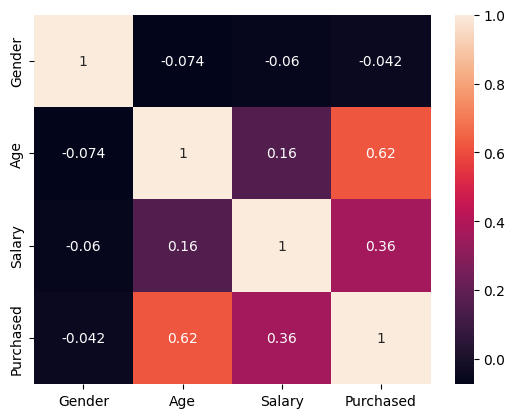

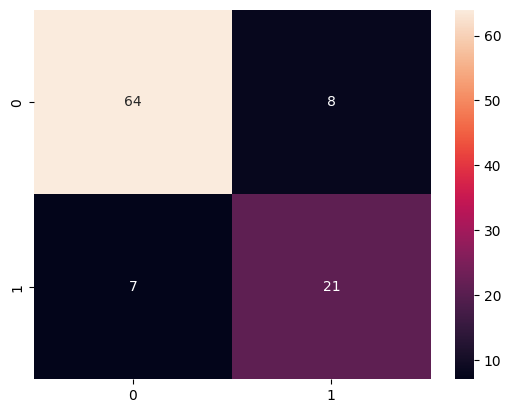

              precision    recall  f1-score   support

           0       0.90      0.89      0.90        72
           1       0.72      0.75      0.74        28

    accuracy                           0.85       100
   macro avg       0.81      0.82      0.82       100
weighted avg       0.85      0.85      0.85       100



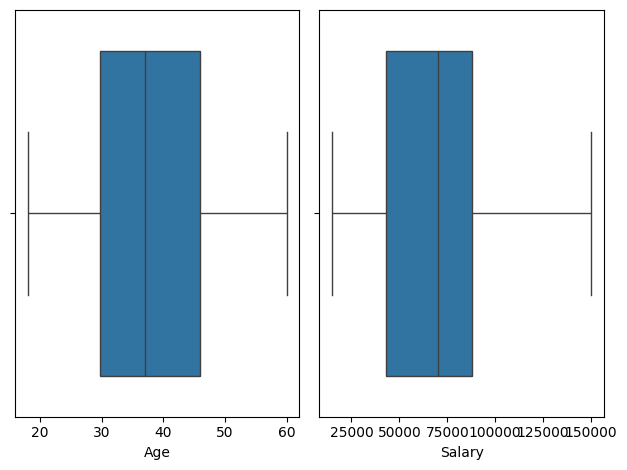

Highest allowed in variable: Age 70.375
lowest allowed in variable: Age 5.375
Total outliers in: Age : 0
Highest allowed in variable: Salary 155500.0
lowest allowed in variable: Salary -24500.0
Total outliers in: Salary : 0


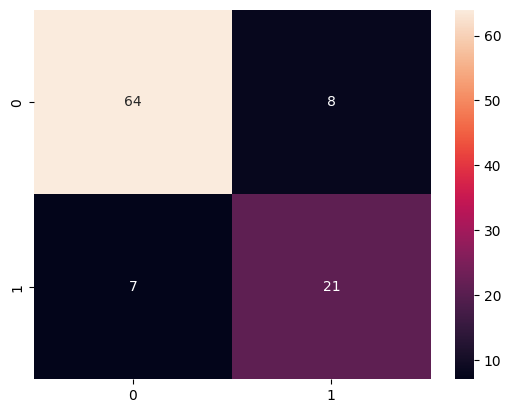

              precision    recall  f1-score   support

           0       0.90      0.89      0.90        72
           1       0.72      0.75      0.74        28

    accuracy                           0.85       100
   macro avg       0.81      0.82      0.82       100
weighted avg       0.85      0.85      0.85       100



In [1]:
# Assignment number 5:
 # Load the Social network ads dataset
 # Display basic information
 # Display statistical information
 # Display null values
 # Fill the null values
 # Feature Engineering through correlation matrix
 # Build the Logistic Regression Model and find its classification score
 # Remove outliers and again see the accuracy of the model
#---------------------------------------------------------------------------------------
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#---------------------------------------------------------------------------------------
def RemoveOutlier(df,var):
 Q1 = df[var].quantile(0.25)
 Q3 = df[var].quantile(0.75)
 IQR = Q3 - Q1
 high, low = Q3+1.5*IQR, Q1-1.5*IQR

 print("Highest allowed in variable:", var, high)
 print("lowest allowed in variable:", var, low)
 count = df[(df[var] > high) | (df[var] < low)][var].count()
 print('Total outliers in:',var,':',count)
 df = df[((df[var] >= low) & (df[var] <= high))]
 return df
#---------------------------------------------------------------------------------------
def BuildModel(X, Y):
 # Training and testing data
 from sklearn.model_selection import train_test_split
 # Assign test data size 20%
 xtrain, xtest, ytrain, ytest =train_test_split(X,Y,test_size= 0.25, random_state=13)
 from sklearn.linear_model import LogisticRegression
 model = LogisticRegression(solver = 'lbfgs')
 model = model.fit(xtrain,ytrain)
 ypred = model.predict(xtest)

 from sklearn.metrics import confusion_matrix
 cm = confusion_matrix(ytest, ypred)
 sns.heatmap(cm, annot=True)
 plt.show()
 from sklearn.metrics import classification_report
 print(classification_report(ytest, ypred))
#---------------------------------------------------------------------------------------
# Reading dataset
df = pd.read_csv('purchase.csv')
# Display basic information
print('Information of Dataset:\n', df.info)
print('Shape of Dataset (row x column): ', df.shape)
print('Columns Name: ', df.columns)
print('Total elements in dataset:', df.size)
print('Datatype of attributes (columns):', df.dtypes)
print('First 5 rows:\n', df.head().T)
print('Last 5 rows:\n',df.tail().T)
print('Any 5 rows:\n',df.sample(5).T)
df = df.drop('User ID', axis=1)
df.columns = ['Gender', 'Age', 'Salary', 'Purchased']
#---------------------------------------------------------------------------------------
# Display Statistical information
print('Statistical information of Numerical Columns: \n',df.describe())
#---------------------------------------------------------------------------------------
# Display Null values
print('Total Number of Null Values in Dataset:', df.isna().sum())
#---------------------------------------------------------------------------------------
# Label encoding method
df['Gender']=df['Gender'].astype('category')
df['Gender']=df['Gender'].cat.codes
# Display correlation matrix
sns.heatmap(df.corr(),annot=True)
plt.show()
#---------------------------------------------------------------------------------------
# Choosing input and output variables from correlation matrix
X = df[['Age','Salary']]
Y = df['Purchased']
BuildModel(X, Y)
# #---------------------------------------------------------------------------------------
# Checking model score after removing outliers
fig, axes = plt.subplots(1,2)
sns.boxplot(data = df, x ='Age', ax=axes[0])
sns.boxplot(data = df, x ='Salary', ax=axes[1])
fig.tight_layout()
plt.show()
df = RemoveOutlier(df, 'Age')
df = RemoveOutlier(df, 'Salary')
# You can use normalization method to improve the score
# salary -> high range
# age -> low range
# Normalization will smoothe both range salary and age
# Choosing input and output variables from correlation matrix
X = df[['Age','Salary']]
Y = df['Purchased']
BuildModel(X, Y)